In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("salary.csv")

In [3]:
df.head()

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.head()

,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [6]:
df.shape

(1032, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 15 columns):
age               1032 non-null int64
Workclass         1032 non-null object
fnlwgt            1032 non-null int64
education         1032 non-null object
education-num     1032 non-null int64
marital-status    1032 non-null object
occupation        1032 non-null object
relationship      1032 non-null object
race              1032 non-null object
sex               1032 non-null object
capital-gain      1032 non-null int64
capital-loss      1032 non-null int64
hours-per-week    1032 non-null int64
native-country    1032 non-null object
Income            1032 non-null int64
dtypes: int64(7), object(8)
memory usage: 121.1+ KB


In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
count,1032.000000,1.032000e+03,1032.000000,1032.00000,1032.000000,1032.000000,1032.000000
mean,37.954457,1.918318e+05,10.221899,560.19186,102.870155,40.706395,0.246124
std,12.825353,1.074243e+05,2.501636,2406.47961,432.251488,11.736603,0.430961
min,17.000000,2.117400e+04,1.000000,0.00000,0.000000,1.000000,0.000000
25%,28.000000,1.155792e+05,9.000000,0.00000,0.000000,40.000000,0.000000
50%,37.000000,1.807065e+05,10.000000,0.00000,0.000000,40.000000,0.000000
75%,46.000000,2.461932e+05,13.000000,0.00000,0.000000,45.000000,0.000000
max,90.000000,1.033222e+06,16.000000,25236.00000,2415.000000,99.000000,1.000000


In [9]:
df.isnull().sum()

age               0
Workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [10]:
df_cat=df.select_dtypes(object)
df_num=df.select_dtypes(["int64","float64"])

In [11]:
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


In [12]:
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


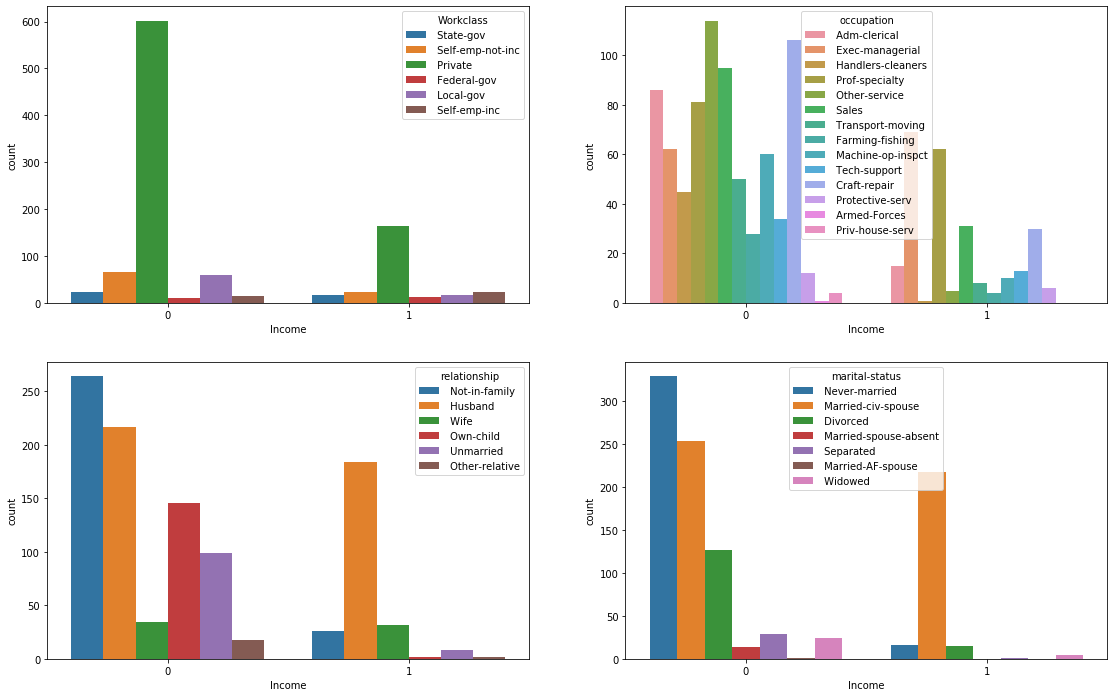

In [13]:
figure,axes=plt.subplots(2,2,figsize=(19,12))
sns.countplot(data=df_cat,x=df_num["Income"],hue="Workclass",ax=axes[0,0])
sns.countplot(data=df_cat,x=df_num["Income"],hue="occupation",ax=axes[0,1])
sns.countplot(data=df_cat,x=df_num["Income"],hue="relationship",ax=axes[1,0])
sns.countplot(data=df_cat,x=df_num["Income"],hue="marital-status",ax=axes[1,1])
plt.show()

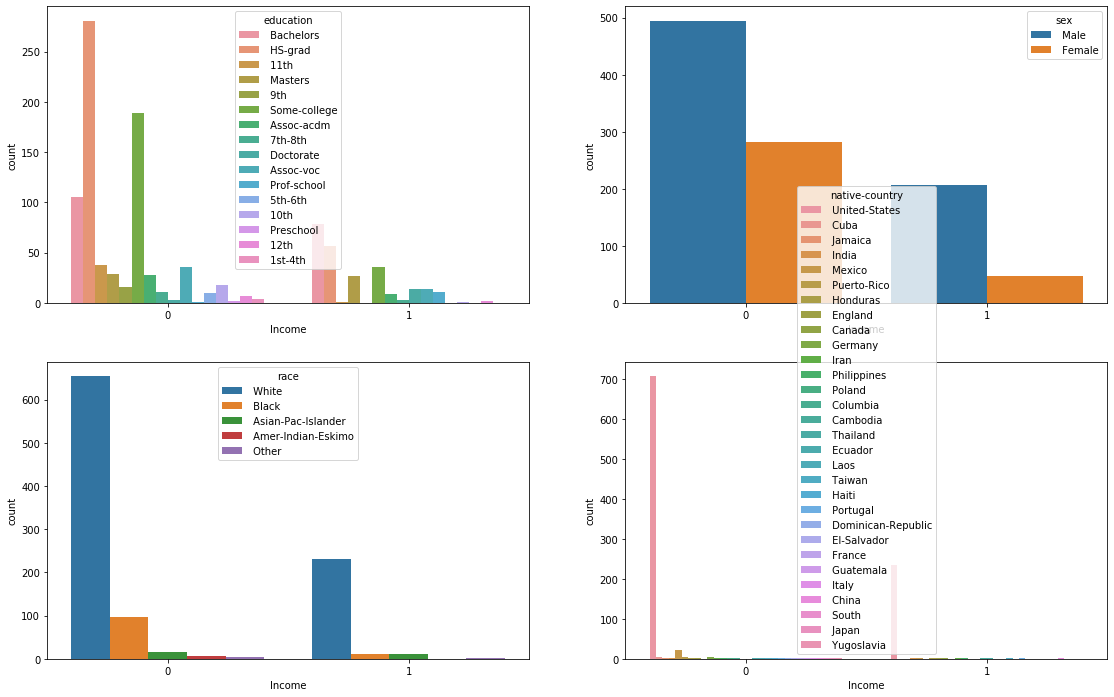

In [14]:
figure,axes=plt.subplots(2,2,figsize=(19,12))
sns.countplot(data=df_cat,x=df_num["Income"],hue="education",ax=axes[0,0])
sns.countplot(data=df_cat,x=df_num["Income"],hue="sex",ax=axes[0,1])
sns.countplot(data=df_cat,x=df_num["Income"],hue="race",ax=axes[1,0])
sns.countplot(data=df_cat,x=df_num["Income"],hue="native-country",ax=axes[1,1])
plt.show()

In [15]:
# Handling categorical data

from sklearn.preprocessing import LabelEncoder

In [16]:
for col in df_cat:
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [17]:
df_cat.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,5,9,4,0,1,4,1,28
1,4,9,2,3,0,4,1,28
2,2,11,0,5,1,4,1,28
3,2,1,2,5,0,2,1,28
4,2,9,2,9,5,2,0,4


In [18]:
df_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income
0,39,77516,13,2174,0,40,0
1,50,83311,13,0,0,13,0
2,38,215646,9,0,0,40,0
3,53,234721,7,0,0,40,0
4,28,338409,13,0,0,40,0


age


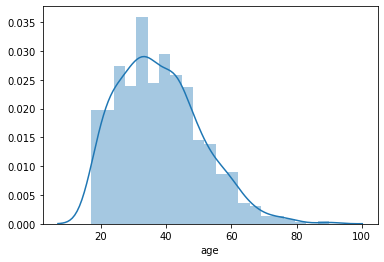

fnlwgt


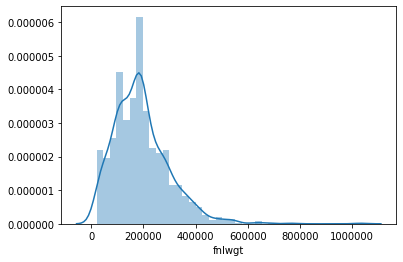

education-num


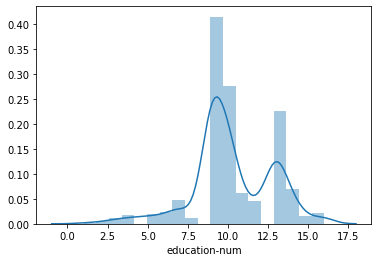

capital-gain


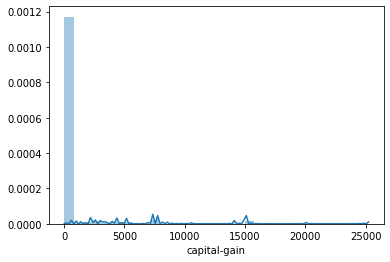

capital-loss


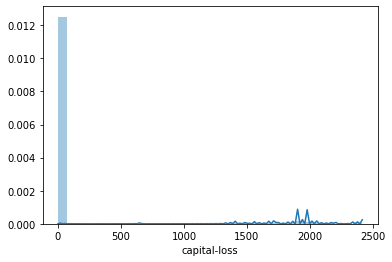

hours-per-week


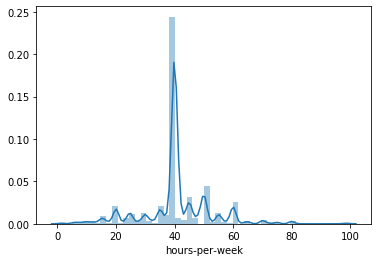

Income


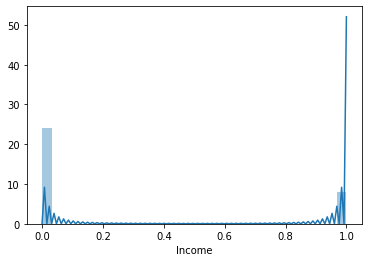

In [19]:
for col in df_num:
    print(col)
    plt.figure()
    sns.distplot(df_num[col])
    plt.show()

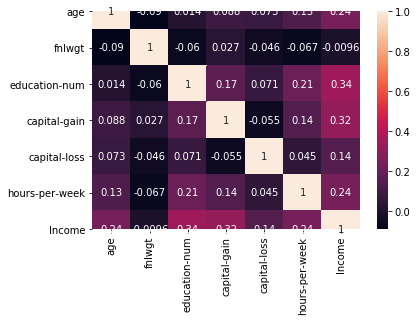

In [20]:
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [21]:
df_num.drop("fnlwgt",axis=1,inplace=True)

In [22]:
df_new=pd.concat([df_cat,df_num],axis=1)
df_new.head()

,Workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,education-num,capital-gain,capital-loss,hours-per-week,Income
0,5,9,4,0,1,4,1,28,39,13,2174,0,40,0
1,4,9,2,3,0,4,1,28,50,13,0,0,13,0
2,2,11,0,5,1,4,1,28,38,9,0,0,40,0
3,2,1,2,5,0,2,1,28,53,7,0,0,40,0
4,2,9,2,9,5,2,0,4,28,13,0,0,40,0


In [23]:
x=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [25]:
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    return model

In [26]:
lr=LogisticRegression()
create_model(lr)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       238
           1       0.72      0.40      0.52        72

    accuracy                           0.83       310
   macro avg       0.78      0.68      0.71       310
weighted avg       0.81      0.83      0.81       310



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
dt=DecisionTreeClassifier()
create_model(dt)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       238
           1       0.59      0.56      0.57        72

    accuracy                           0.81       310
   macro avg       0.73      0.72      0.72       310
weighted avg       0.80      0.81      0.80       310



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
dt1=DecisionTreeClassifier(max_depth=5)
create_model(dt1)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       238
           1       0.69      0.53      0.60        72

    accuracy                           0.84       310
   macro avg       0.78      0.73      0.75       310
weighted avg       0.83      0.84      0.83       310



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
dt2=DecisionTreeClassifier(min_samples_leaf=60)
create_model(dt2)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       238
           1       0.69      0.46      0.55        72

    accuracy                           0.83       310
   macro avg       0.77      0.70      0.72       310
weighted avg       0.81      0.83      0.81       310



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=60, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
lsvc=LinearSVC(random_state=1)
create_model(lsvc)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       238
           1       0.92      0.17      0.28        72

    accuracy                           0.80       310
   macro avg       0.86      0.58      0.58       310
weighted avg       0.83      0.80      0.75       310



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=1, tol=0.0001,
          verbose=0)

In [31]:
lsvc2=SVC()
create_model(lsvc2)

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       238
           1       0.33      0.03      0.05        72

    accuracy                           0.76       310
   macro avg       0.55      0.51      0.46       310
weighted avg       0.67      0.76      0.67       310



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)